If using pip instead of uv, install the requirements using:

```bash
pip install numpy matplotlib scikit-learn
```

or convert `pyproject.toml` to requirements and run:

```bash
pip install -r requirements.txt
```

Requires python 3.8+

In [9]:
# !uv init
# !uv add numpy
# !uv add matplotlib
# !uv add scikit-learn
!uv add pandas
!uv add seaborn

Resolved 19 packages in 1ms
Audited 18 packages in 1ms
Resolved 20 packages in 189ms
Prepared 1 package in 148ms
Installed 1 package in 43ms
 + seaborn==0.13.2


## Control Experiment

Run KMEANS and DBSCAN algorithms using scikit-learn implementations and preset datasets.

Visualize accuracy plot.

TODO: visualize time complexity time-delta vs len(dataset)

K-MEANS vs DBSCAN CLUSTERING COMPARISON

TESTING ON: BLOBS
Dataset size: 500 samples, 2 features

K-Means Runtime: 2.1350 seconds

K-Means Results:
  Number of clusters: 4
  Noise points: 0
  Silhouette Score: 0.834 (higher is better)
  Davies-Bouldin Index: 0.234 (lower is better)
  Calinski-Harabasz Score: 8950.625 (higher is better)

DBSCAN Runtime: 0.0028 seconds

DBSCAN Results:
  Number of clusters: 5
  Noise points: 36
  Silhouette Score: 0.716 (higher is better)
  Davies-Bouldin Index: 0.403 (lower is better)
  Calinski-Harabasz Score: 7826.867 (higher is better)


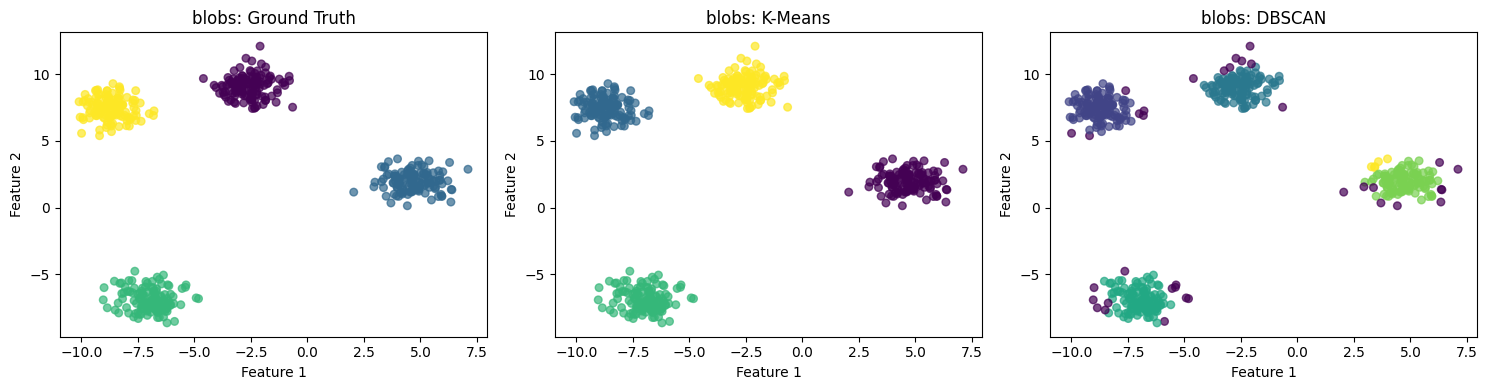


TESTING ON: MOONS
Dataset size: 400 samples, 2 features

K-Means Runtime: 0.0342 seconds

K-Means Results:
  Number of clusters: 2
  Noise points: 0
  Silhouette Score: 0.486 (higher is better)
  Davies-Bouldin Index: 0.783 (lower is better)
  Calinski-Harabasz Score: 581.145 (higher is better)

DBSCAN Runtime: 0.0019 seconds

DBSCAN Results:
  Number of clusters: 2
  Noise points: 1
  Silhouette Score: 0.322 (higher is better)
  Davies-Bouldin Index: 1.179 (lower is better)
  Calinski-Harabasz Score: 251.008 (higher is better)


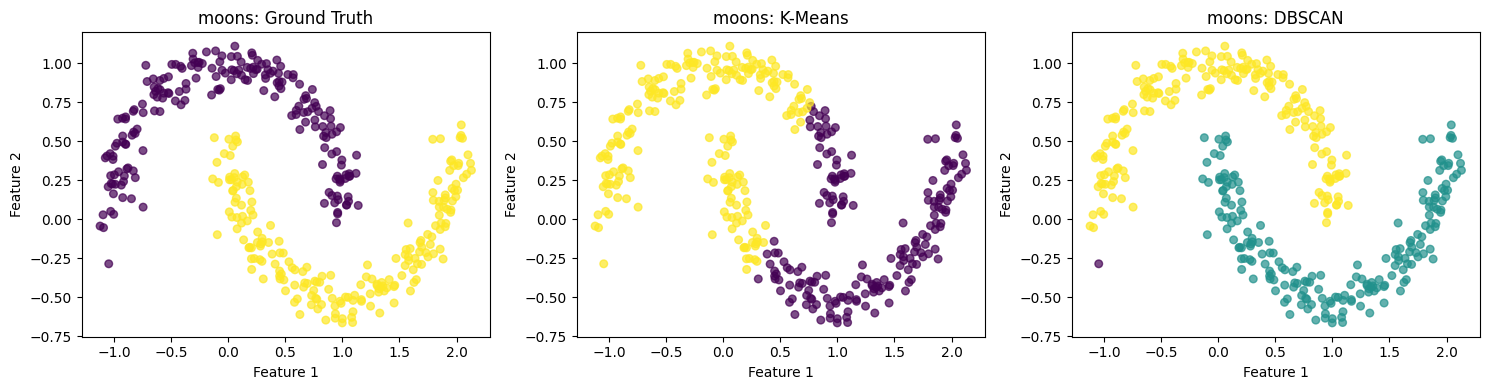


TESTING ON: CIRCLES
Dataset size: 400 samples, 2 features

K-Means Runtime: 0.0188 seconds

K-Means Results:
  Number of clusters: 2
  Noise points: 0
  Silhouette Score: 0.354 (higher is better)
  Davies-Bouldin Index: 1.177 (lower is better)
  Calinski-Harabasz Score: 232.191 (higher is better)

DBSCAN Runtime: 0.0023 seconds

DBSCAN Results:
  Number of clusters: 2
  Noise points: 0
  Silhouette Score: 0.111 (higher is better)
  Davies-Bouldin Index: 331.853 (lower is better)
  Calinski-Harabasz Score: 0.003 (higher is better)


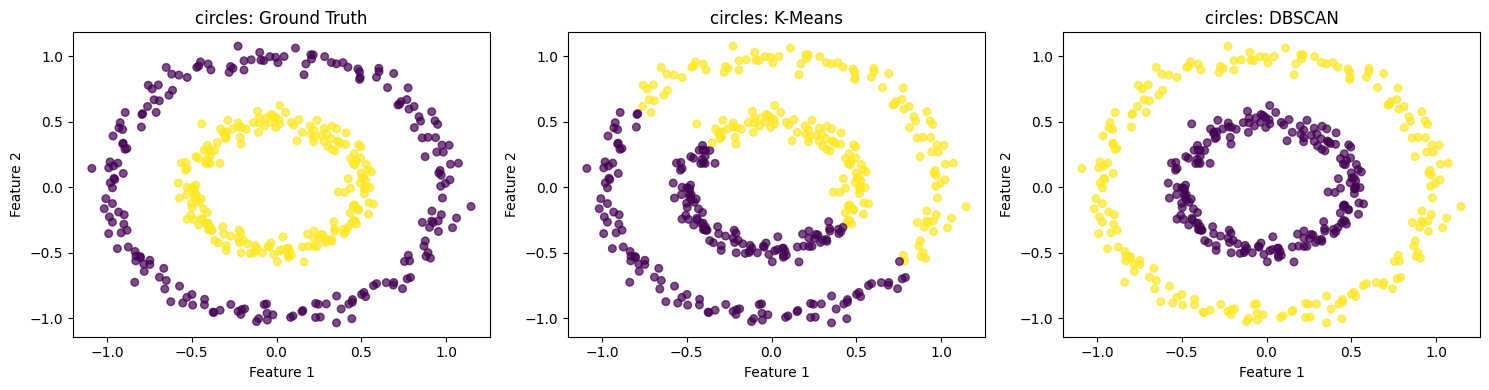


TESTING ON: NOISY_BLOBS
Dataset size: 460 samples, 2 features

K-Means Runtime: 0.0199 seconds

K-Means Results:
  Number of clusters: 3
  Noise points: 0
  Silhouette Score: 0.815 (higher is better)
  Davies-Bouldin Index: 0.232 (lower is better)
  Calinski-Harabasz Score: 3412.046 (higher is better)

DBSCAN Runtime: 0.0019 seconds

DBSCAN Results:
  Number of clusters: 3
  Noise points: 84
  Silhouette Score: 0.914 (higher is better)
  Davies-Bouldin Index: 0.123 (lower is better)
  Calinski-Harabasz Score: 20859.916 (higher is better)


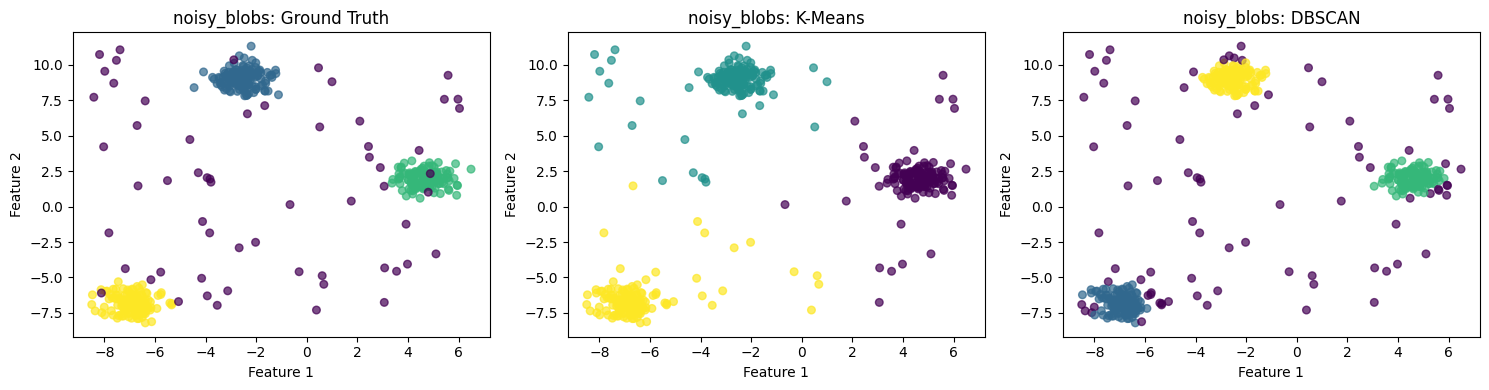


TESTING COMPLETE


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

np.random.seed(42)

def generate_datasets():
    """Generate multiple synthetic datasets for testing"""
    
    datasets = {}
    
    # Dataset 1: Spherical Blobs (K-Means advantage)
    X1, y1 = make_blobs(n_samples=500, centers=4, n_features=2, 
                        cluster_std=0.8, random_state=42)
    datasets['blobs'] = (X1, y1)
    
    # Dataset 2: Moon Shapes (DBSCAN advantage)
    X2, y2 = make_moons(n_samples=400, noise=0.08, random_state=42)
    datasets['moons'] = (X2, y2)
    
    # Dataset 3: Concentric Circles (DBSCAN advantage)
    X3, y3 = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)
    datasets['circles'] = (X3, y3)
    
    # Dataset 4: Noisy Blobs (test noise robustness)
    X4, y4 = make_blobs(n_samples=400, centers=3, n_features=2, 
                        cluster_std=0.6, random_state=42)
    # Add 15% outlier noise
    n_outliers = int(0.15 * len(X4))
    outliers = np.random.uniform(low=X4.min(axis=0), high=X4.max(axis=0), 
                                  size=(n_outliers, 2))
    X4_noisy = np.vstack([X4, outliers])
    y4_noisy = np.hstack([y4, np.full(n_outliers, -1)])  # -1 for noise
    datasets['noisy_blobs'] = (X4_noisy, y4_noisy)
    
    return datasets

def run_kmeans(X, n_clusters=3):
    """Run K-Means clustering"""
    start_time = time.time()
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', 
                    n_init=10, max_iter=300, random_state=42)
    labels = kmeans.fit_predict(X)
    
    runtime = time.time() - start_time
    
    return labels, kmeans, runtime

def run_dbscan(X, eps=0.3, min_samples=5):
    """Run DBSCAN clustering"""
    start_time = time.time()
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    labels = dbscan.fit_predict(X)
    
    runtime = time.time() - start_time
    
    return labels, dbscan, runtime

def evaluate_clustering(X, labels, algorithm_name):
    """Calculate clustering quality metrics"""
    
    # Count clusters (excluding noise points labeled -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f"{algorithm_name} Results:")
    print(f"Number of clusters: {n_clusters}")
    print(f"Noise points: {n_noise}")
    
    # Calculate metrics only if we have more than 1 cluster
    if n_clusters > 1 and n_clusters < len(X):
        # Filter out noise points for metric calculation
        mask = labels != -1
        if mask.sum() > 0:
            try:
                silhouette = silhouette_score(X[mask], labels[mask])
                davies_bouldin = davies_bouldin_score(X[mask], labels[mask])
                calinski = calinski_harabasz_score(X[mask], labels[mask])
                
                print(f"  Silhouette Score: {silhouette:.3f} (higher is better)")
                print(f"  Davies-Bouldin Index: {davies_bouldin:.3f} (lower is better)")
                print(f"  Calinski-Harabasz Score: {calinski:.3f} (higher is better)")
                
                return {
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'silhouette': silhouette,
                    'davies_bouldin': davies_bouldin,
                    'calinski_harabasz': calinski
                }
            except:
                print("Could not calculate quality metrics")
    else:
        print("Not enough clusters for quality metrics")
    
    return None

def plot_comparison(X, y_true, labels_kmeans, labels_dbscan, dataset_name):
    """Plot side-by-side comparison of K-Means and DBSCAN"""
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Ground truth (if available)
    axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30, alpha=0.7)
    axes[0].set_title(f'{dataset_name}: Ground Truth')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    
    # K-Means results
    axes[1].scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis', s=30, alpha=0.7)
    axes[1].set_title(f'{dataset_name}: K-Means')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    
    # DBSCAN results (noise points in black)
    colors = labels_dbscan.copy()
    axes[2].scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis', s=30, alpha=0.7)
    axes[2].set_title(f'{dataset_name}: DBSCAN')
    axes[2].set_xlabel('Feature 1')
    axes[2].set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

def main():
    print("="*70)
    print("K-MEANS vs DBSCAN CLUSTERING COMPARISON")
    print("="*70)
    
    # Generate datasets
    datasets = generate_datasets()
    
    # Test parameters for each dataset
    test_params = {
        'blobs': {'kmeans_k': 4, 'dbscan_eps': 0.5, 'dbscan_min_samples': 5},
        'moons': {'kmeans_k': 2, 'dbscan_eps': 0.2, 'dbscan_min_samples': 5},
        'circles': {'kmeans_k': 2, 'dbscan_eps': 0.15, 'dbscan_min_samples': 5},
        'noisy_blobs': {'kmeans_k': 3, 'dbscan_eps': 0.4, 'dbscan_min_samples': 5}
    }
    
    # Test each dataset
    for dataset_name, (X, y_true) in datasets.items():
        print(f"TESTING ON: {dataset_name.upper()}")
        print(f"Dataset size: {X.shape[0]} samples, {X.shape[1]} features")
        
        params = test_params[dataset_name]
        
        # Run K-Means
        labels_km, model_km, runtime_km = run_kmeans(
            X, n_clusters=params['kmeans_k']
        )
        print(f"K-Means Runtime: {runtime_km:.4f} seconds")
        metrics_km = evaluate_clustering(X, labels_km, "K-Means")
        
        # Run DBSCAN
        labels_db, model_db, runtime_db = run_dbscan(
            X, eps=params['dbscan_eps'], min_samples=params['dbscan_min_samples']
        )
        print(f"DBSCAN Runtime: {runtime_db:.4f} seconds")
        metrics_db = evaluate_clustering(X, labels_db, "DBSCAN")
        
        # Visualize results
        plot_comparison(X, y_true, labels_km, labels_db, dataset_name)
    
main()


1. Measure runtime as dataset size increases (50 to 50,000 samples)
2. Fit complexity models (O(n), O(n log n), O(n²)) to real timing data
3. Identify performance crossover point
4. Visualize scaling behavior

experiment should result in something like

1. K-Means exhibits O(n) linear complexity - runtime scales linearly with dataset size
2. DBSCAN exhibits O(n²) quadratic complexity - runtime scales quadratically without spatial indexing
3. Crossover point is around xx samples where K-Means becomes faster
4. At large scale (50,000 samples), K-Means is xx faster than DBSCAN

K-MEANS vs DBSCAN: TIME COMPLEXITY ANALYSIS
Testing 14 different dataset sizes
Range: 50 to 50,000 samples
RUNNING EXPERIMENT: BLOBS
Generating synthetic datasets...
Testing n=50 samples... K-Means:  18.36ms | DBSCAN:    0.70ms | Ratio:  0.04x
Testing n=100 samples... K-Means:  17.59ms | DBSCAN:    0.72ms | Ratio:  0.04x
Testing n=200 samples... K-Means:  18.48ms | DBSCAN:    0.92ms | Ratio:  0.05x
Testing n=500 samples... K-Means:  21.36ms | DBSCAN:    2.13ms | Ratio:  0.10x
Testing n=1,000 samples... K-Means:  25.51ms | DBSCAN:    3.72ms | Ratio:  0.15x
Testing n=2,000 samples... K-Means:  11.64ms | DBSCAN:    8.81ms | Ratio:  0.76x
Testing n=3,000 samples... K-Means:  12.84ms | DBSCAN:   17.36ms | Ratio:  1.35x
Testing n=5,000 samples... K-Means:  14.31ms | DBSCAN:   32.90ms | Ratio:  2.30x
Testing n=7,500 samples... K-Means:  16.62ms | DBSCAN:   55.86ms | Ratio:  3.36x
Testing n=10,000 samples... K-Means:  20.41ms | DBSCAN:   84.23ms | Ratio:  4.13x
Testing n=15,000 samples... K-Me

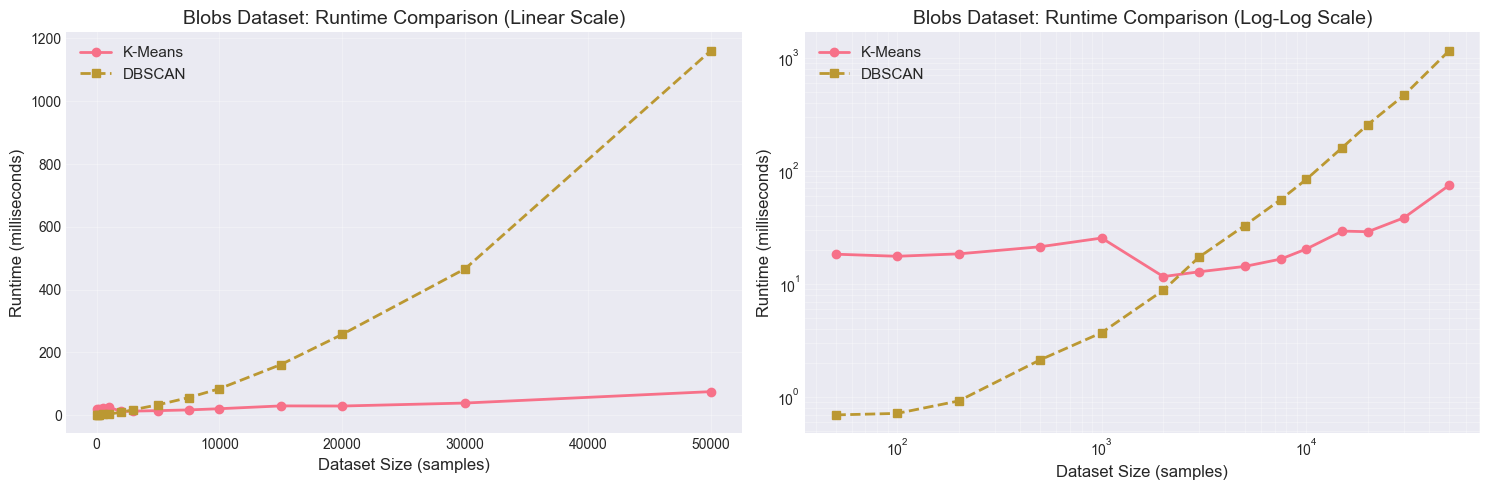

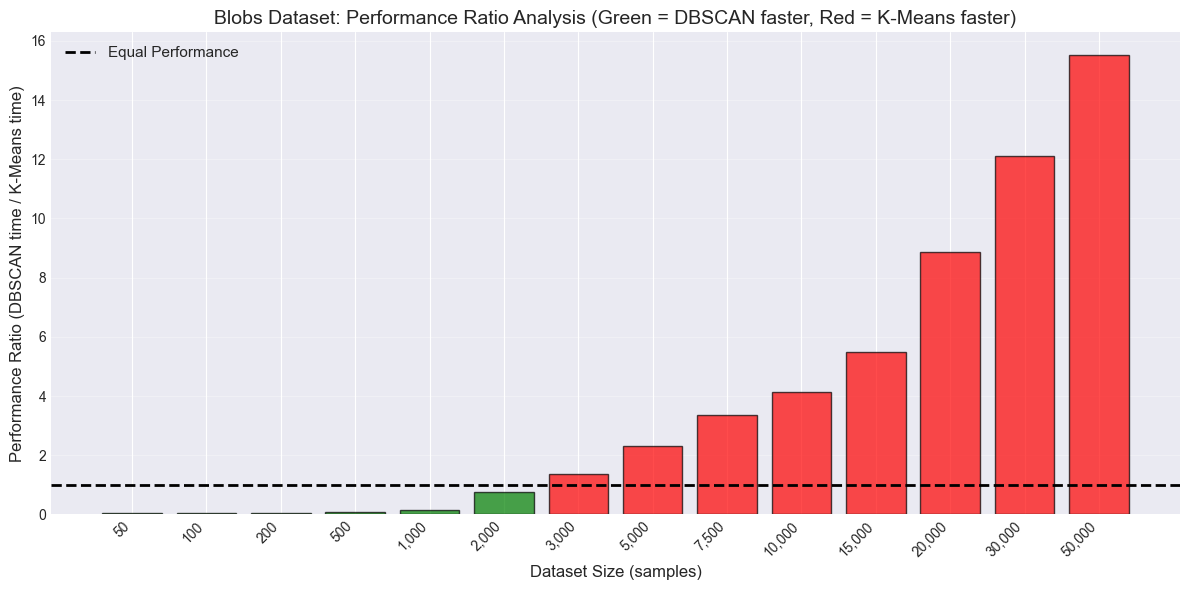

K-MEANS COMPLEXITY ANALYSIS:
--------------------------------------------------------------------------------


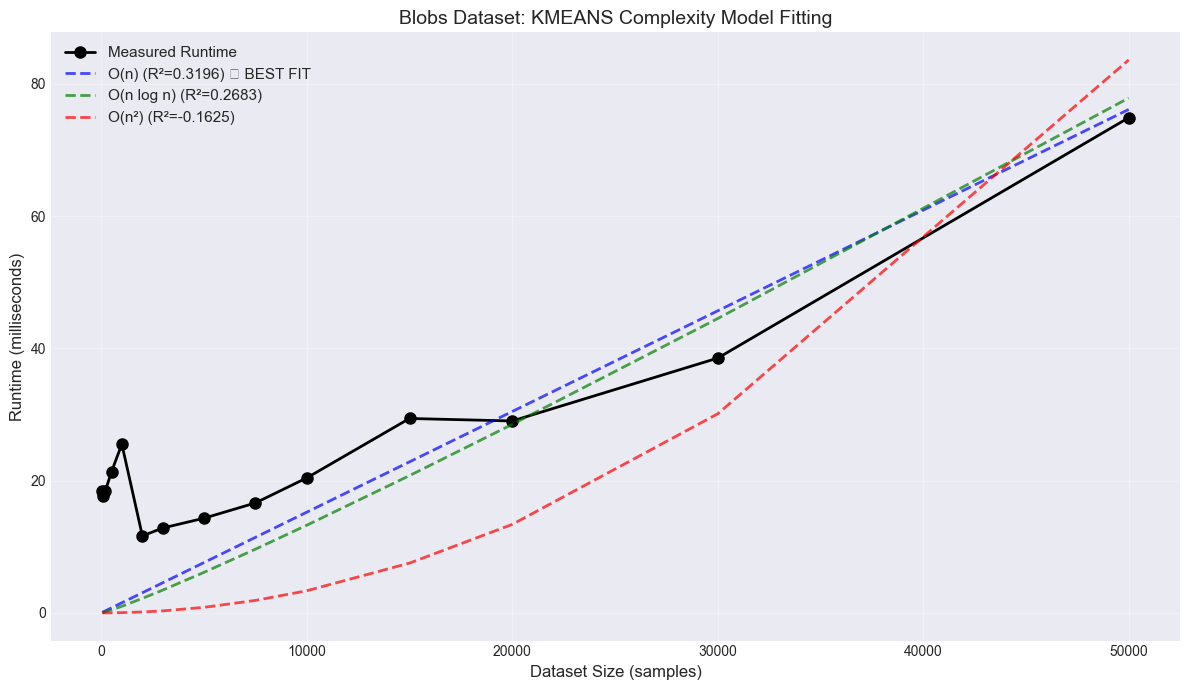

Best fit for K-Means: O(n)
  O(n): R² = 0.319602, coefficient = 1.52e-06
  O(n log n): R² = 0.268296, coefficient = 1.44e-07
  O(n²): R² = -0.162454, coefficient = 3.34e-11
DBSCAN COMPLEXITY ANALYSIS:
--------------------------------------------------------------------------------


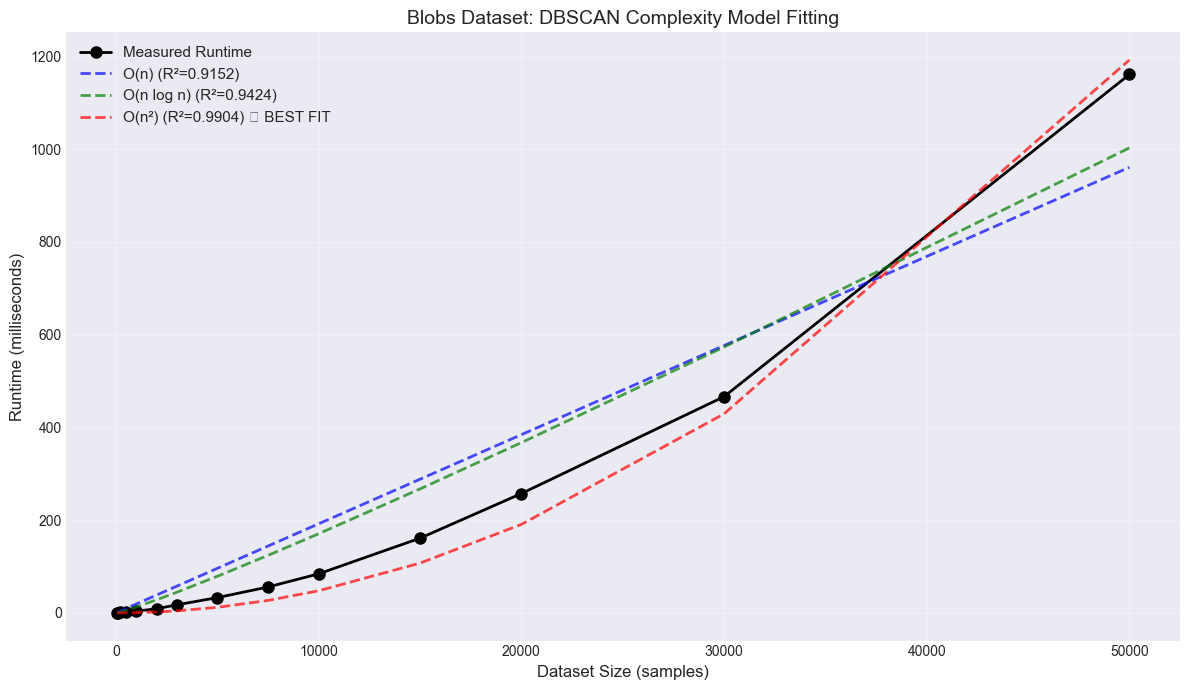

Best fit for DBSCAN: O(n²)
  O(n): R² = 0.915219, coefficient = 1.92e-05
  O(n log n): R² = 0.942364, coefficient = 1.85e-06
  O(n²): R² = 0.990416, coefficient = 4.77e-10
CROSSOVER POINT:
At 100 samples:
K-Means: 17.59ms
DBSCAN:  0.72ms
DBSCAN is 24.5x faster
At 50,000 samples:
K-Means: 74.86ms
DBSCAN:  1161.41ms
K-Means is 15.5x faster
GROWTH PATTERN ANALYSIS:
From 100 to 50,000 samples (500x increase):
- K-Means: 4.3x slower → Linear O(n)
- DBSCAN:  1620x slower → Quadratic O(n²)
 Sample_Size  KMeans_ms  DBSCAN_ms  Performance_Ratio  Winner
          50      18.36       0.70               0.04  DBSCAN
         100      17.59       0.72               0.04  DBSCAN
         200      18.48       0.92               0.05  DBSCAN
         500      21.36       2.13               0.10  DBSCAN
        1000      25.51       3.72               0.15  DBSCAN
        2000      11.64       8.81               0.76  DBSCAN
        3000      12.84      17.36               1.35 K-Means
        5000    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.optimize import curve_fit
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def generate_scaling_datasets(sample_sizes):
    """
    Generate synthetic datasets of varying sizes for complexity testing.
    
    Parameters:
    -----------
    sample_sizes : list
        List of sample sizes to generate (e.g., [100, 500, 1000, 5000])
    
    Returns:
    --------
    dict : Dictionary with dataset types as keys, list of (size, data) tuples as values
    """
    datasets = {
        'blobs': [],
        'moons': [],
        'circles': []
    }
    
    print("Generating synthetic datasets...")
    for size in sample_sizes:
        # Spherical blobs (K-Means advantage)
        X_blobs, _ = make_blobs(n_samples=size, centers=5, n_features=2, 
                                cluster_std=0.8, random_state=42)
        datasets['blobs'].append((size, X_blobs))
        
        # Moon shapes (DBSCAN advantage)
        X_moons, _ = make_moons(n_samples=size, noise=0.08, random_state=42)
        datasets['moons'].append((size, X_moons))
        
        # Concentric circles (DBSCAN advantage)
        X_circles, _ = make_circles(n_samples=size, noise=0.05, factor=0.5, random_state=42)
        datasets['circles'].append((size, X_circles))
    
    return datasets

def benchmark_algorithm(algorithm, X, params, n_runs=3):
    """
    Benchmark clustering algorithm with multiple runs.
    
    Parameters:
    -----------
    algorithm : class
        Clustering algorithm class (KMeans or DBSCAN)
    X : array-like
        Input data
    params : dict
        Algorithm parameters
    n_runs : int
        Number of runs for averaging
    
    Returns:
    --------
    tuple : (mean_time, std_time, labels)
    """
    times = []
    labels = None
    
    for _ in range(n_runs):
        start = time.perf_counter()
        model = algorithm(**params)
        labels = model.fit_predict(X)
        elapsed = time.perf_counter() - start
        times.append(elapsed)
    
    return np.mean(times), np.std(times), labels

def run_complexity_experiment(sample_sizes, dataset_type='blobs'):
    """
    Run complete complexity experiment for a specific dataset type.
    
    Parameters:
    -----------
    sample_sizes : list
        List of sample sizes to test
    dataset_type : str
        Type of dataset ('blobs', 'moons', or 'circles')
    
    Returns:
    --------
    pd.DataFrame : Results with timing data
    """
    print(f"RUNNING EXPERIMENT: {dataset_type.upper()}")
    
    # Generate datasets
    datasets = generate_scaling_datasets(sample_sizes)
    
    # Algorithm parameters
    params_map = {
        'blobs': {'kmeans': {'n_clusters': 5}, 'dbscan': {'eps': 0.5, 'min_samples': 5}},
        'moons': {'kmeans': {'n_clusters': 2}, 'dbscan': {'eps': 0.2, 'min_samples': 5}},
        'circles': {'kmeans': {'n_clusters': 2}, 'dbscan': {'eps': 0.15, 'min_samples': 5}}
    }
    
    params = params_map[dataset_type]
    results = []
    
    for size, X in datasets[dataset_type]:
        print(f"Testing n={size:,} samples...", end=" ")
        
        # Benchmark K-Means
        km_params = {**params['kmeans'], 'init': 'k-means++', 'n_init': 10, 
                     'max_iter': 300, 'random_state': 42}
        km_time, km_std, km_labels = benchmark_algorithm(KMeans, X, km_params, n_runs=3)
        
        # Benchmark DBSCAN
        db_params = {**params['dbscan'], 'metric': 'euclidean'}
        db_time, db_std, db_labels = benchmark_algorithm(DBSCAN, X, db_params, n_runs=3)
        
        # Calculate metrics
        ratio = db_time / km_time if km_time > 0 else 0
        
        print(f"K-Means: {km_time*1000:6.2f}ms | DBSCAN: {db_time*1000:7.2f}ms | Ratio: {ratio:5.2f}x")
        
        results.append({
            'sample_size': size,
            'kmeans_time_sec': km_time,
            'kmeans_std_sec': km_std,
            'dbscan_time_sec': db_time,
            'dbscan_std_sec': db_std,
            'ratio': ratio
        })
    
    return pd.DataFrame(results)

def linear(n, a):
    """O(n) complexity model"""
    return a * n

def nlogn(n, a):
    """O(n log n) complexity model"""
    return a * n * np.log(n)

def quadratic(n, a):
    """O(n²) complexity model"""
    return a * n**2

def r_squared(y_actual, y_predicted):
    """Calculate R² score"""
    ss_res = np.sum((y_actual - y_predicted)**2)
    ss_tot = np.sum((y_actual - np.mean(y_actual))**2)
    return 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

def fit_complexity_models(df, algorithm='kmeans'):
    """
    Fit a few complexity models. Easier but less accurate than sklearn fit
    
    Parameters:
    -----------
    df : pd.DataFrame
        Results dataframe with timing data
    algorithm : str
        'kmeans' or 'dbscan'
    
    Returns:
    --------
    dict : Fitted models and R² scores
    """
    sizes = df['sample_size'].values
    times = df[f'{algorithm}_time_sec'].values
    
    fits = {}
    
    # Fit O(n)
    try:
        popt_lin, _ = curve_fit(linear, sizes, times, p0=[1e-6], maxfev=10000)
        pred_lin = linear(sizes, *popt_lin)
        fits['O(n)'] = {
            'r2': r_squared(times, pred_lin),
            'coef': popt_lin[0],
            'pred': pred_lin
        }
    except:
        fits['O(n)'] = {'r2': -1, 'coef': None, 'pred': None}
    
    # Fit O(n log n)
    try:
        popt_nlogn, _ = curve_fit(nlogn, sizes, times, p0=[1e-6], maxfev=10000)
        pred_nlogn = nlogn(sizes, *popt_nlogn)
        fits['O(n log n)'] = {
            'r2': r_squared(times, pred_nlogn),
            'coef': popt_nlogn[0],
            'pred': pred_nlogn
        }
    except:
        fits['O(n log n)'] = {'r2': -1, 'coef': None, 'pred': None}
    
    # Fit O(n²)
    try:
        popt_quad, _ = curve_fit(quadratic, sizes, times, p0=[1e-8], maxfev=10000)
        pred_quad = quadratic(sizes, *popt_quad)
        fits['O(n²)'] = {
            'r2': r_squared(times, pred_quad),
            'coef': popt_quad[0],
            'pred': pred_quad
        }
    except:
        fits['O(n²)'] = {'r2': -1, 'coef': None, 'pred': None}
    
    # Find best fit
    best_model = max(fits.keys(), key=lambda k: fits[k]['r2'])
    
    return fits, best_model

def plot_runtime_comparison(df, dataset_name='Dataset'):
    """Plot runtime comparison between K-Means and DBSCAN"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sizes = df['sample_size']
    km_times = df['kmeans_time_sec'] * 1000  # Convert to ms
    db_times = df['dbscan_time_sec'] * 1000
    
    # Linear scale plot
    ax1.plot(sizes, km_times, 'o-', label='K-Means', linewidth=2, markersize=6)
    ax1.plot(sizes, db_times, 's--', label='DBSCAN', linewidth=2, markersize=6)
    ax1.set_xlabel('Dataset Size (samples)', fontsize=12)
    ax1.set_ylabel('Runtime (milliseconds)', fontsize=12)
    ax1.set_title(f'{dataset_name}: Runtime Comparison (Linear Scale)', fontsize=14)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Log-log scale plot
    ax2.loglog(sizes, km_times, 'o-', label='K-Means', linewidth=2, markersize=6)
    ax2.loglog(sizes, db_times, 's--', label='DBSCAN', linewidth=2, markersize=6)
    ax2.set_xlabel('Dataset Size (samples)', fontsize=12)
    ax2.set_ylabel('Runtime (milliseconds)', fontsize=12)
    ax2.set_title(f'{dataset_name}: Runtime Comparison (Log-Log Scale)', fontsize=14)
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3, which='both')
    
    plt.tight_layout()
    plt.show()

def plot_ratio_analysis(df, dataset_name='Dataset'):
    """Plot performance ratio (DBSCAN/K-Means) over dataset size"""
    fig, ax = plt.subplots(figsize=(12, 6))
    
    sizes = df['sample_size']
    ratios = df['ratio']
    
    colors = ['green' if r < 1 else 'red' for r in ratios]
    ax.bar(range(len(sizes)), ratios, color=colors, alpha=0.7, edgecolor='black')
    ax.axhline(y=1, color='black', linestyle='--', linewidth=2, label='Equal Performance')
    
    ax.set_xticks(range(len(sizes)))
    ax.set_xticklabels([f'{s:,}' for s in sizes], rotation=45, ha='right')
    ax.set_xlabel('Dataset Size (samples)', fontsize=12)
    ax.set_ylabel('Performance Ratio (DBSCAN time / K-Means time)', fontsize=12)
    ax.set_title(f'{dataset_name}: Performance Ratio Analysis (Green = DBSCAN faster, Red = K-Means faster)', 
                 fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

def plot_complexity_fitting(df, algorithm='kmeans', dataset_name='Dataset'):
    """Plot complexity model fitting"""
    sizes = df['sample_size'].values
    times = df[f'{algorithm}_time_sec'].values * 1000  # Convert to ms
    
    fits, best_model = fit_complexity_models(df, algorithm)
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Plot actual data
    ax.plot(sizes, times, 'ko-', label='Measured Runtime', markersize=8, linewidth=2)
    
    # Plot fitted models
    colors = {'O(n)': 'blue', 'O(n log n)': 'green', 'O(n²)': 'red'}
    for model, fit_data in fits.items():
        if fit_data['pred'] is not None:
            label = f"{model} (R²={fit_data['r2']:.4f})"
            if model == best_model:
                label += " ★ BEST FIT"
            ax.plot(sizes, fit_data['pred'] * 1000, '--', 
                   color=colors.get(model, 'gray'), 
                   linewidth=2, label=label, alpha=0.7)
    
    ax.set_xlabel('Dataset Size (samples)', fontsize=12)
    ax.set_ylabel('Runtime (milliseconds)', fontsize=12)
    ax.set_title(f'{dataset_name}: {algorithm.upper()} Complexity Model Fitting', fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fits, best_model

sample_sizes = [50, 100, 200, 500, 1000, 2000, 3000, 5000, 7500, 10000, 15000, 20000, 30000, 50000]

print("="*70)
print("K-MEANS vs DBSCAN: TIME COMPLEXITY ANALYSIS")
print("="*70)
print(f"Testing {len(sample_sizes)} different dataset sizes")
print(f"Range: {min(sample_sizes):,} to {max(sample_sizes):,} samples")

df_blobs = run_complexity_experiment(sample_sizes, dataset_type='blobs')

# Display results
print("BLOBS DATASET RESULTS")
print(df_blobs.to_string(index=False))

# Save to CSV
# df_blobs.to_csv('complexity_blobs_results.csv', index=False)

plot_runtime_comparison(df_blobs, dataset_name='Blobs Dataset')
plot_ratio_analysis(df_blobs, dataset_name='Blobs Dataset')
print("K-MEANS COMPLEXITY ANALYSIS:")
print("-" * 80)
km_fits, km_best = plot_complexity_fitting(df_blobs, algorithm='kmeans', dataset_name='Blobs Dataset')
print(f"Best fit for K-Means: {km_best}")
for model, data in km_fits.items():
    if data['r2'] > -1:
        print(f"  {model}: R² = {data['r2']:.6f}, coefficient = {data['coef']:.2e}")

print("DBSCAN COMPLEXITY ANALYSIS:")
print("=" * 80)
db_fits, db_best = plot_complexity_fitting(df_blobs, algorithm='dbscan', dataset_name='Blobs Dataset')
print(f"Best fit for DBSCAN: {db_best}")
for model, data in db_fits.items():
    if data['r2'] > -1:
        print(f"  {model}: R² = {data['r2']:.6f}, coefficient = {data['coef']:.2e}")

def print_summary_analysis(df):
    print("CROSSOVER POINT:")
    print("=" * 80)
    crossover = df[df['ratio'].between(0.9, 1.1)]
    if len(crossover) > 0:
        crossover_size = crossover.iloc[0]['sample_size']
        print(f"   Performance parity around: {crossover_size:,} samples")
    
    # Small scale
    small = df[df['sample_size'] == 100].iloc[0]
    print(f"At 100 samples:")
    print(f"K-Means: {small['kmeans_time_sec']*1000:.2f}ms")
    print(f"DBSCAN:  {small['dbscan_time_sec']*1000:.2f}ms")
    print(f"DBSCAN is {1/small['ratio']:.1f}x faster")
    
    # Large scale
    large = df[df['sample_size'] == 50000].iloc[0]
    print(f"At 50,000 samples:")
    print(f"K-Means: {large['kmeans_time_sec']*1000:.2f}ms")
    print(f"DBSCAN:  {large['dbscan_time_sec']*1000:.2f}ms")
    print(f"K-Means is {large['ratio']:.1f}x faster")
    
    # Growth analysis
    print("GROWTH PATTERN ANALYSIS:")
    print("=" * 80)
    
    small_km = df[df['sample_size'] == 100]['kmeans_time_sec'].values[0]
    large_km = df[df['sample_size'] == 50000]['kmeans_time_sec'].values[0]
    km_growth = large_km / small_km
    
    small_db = df[df['sample_size'] == 100]['dbscan_time_sec'].values[0]
    large_db = df[df['sample_size'] == 50000]['dbscan_time_sec'].values[0]
    db_growth = large_db / small_db
    
    print(f"From 100 to 50,000 samples (500x increase):")
    print(f"- K-Means: {km_growth:.1f}x slower → Linear O(n)")
    print(f"- DBSCAN:  {db_growth:.0f}x slower → Quadratic O(n²)")

print_summary_analysis(df_blobs)
summary = pd.DataFrame({
    'Sample_Size': df_blobs['sample_size'],
    'KMeans_ms': (df_blobs['kmeans_time_sec'] * 1000).round(2),
    'DBSCAN_ms': (df_blobs['dbscan_time_sec'] * 1000).round(2),
    'Performance_Ratio': df_blobs['ratio'].round(2),
    'Winner': df_blobs['ratio'].apply(lambda x: 'DBSCAN' if x < 1 else 'K-Means')
})

print("="*70)
print(summary.to_string(index=False))
# summary.to_csv('complexity_summary_table.csv', index=False)
